# Scraping the Top Ranked Anime from MyAnimeList 

* In this project I scraped 3000 anime and their rankings using the library beautilfulsoup.
* For that I based my code in two tutorials listed in the references.

In [1]:
#importing the libraries needed
import warnings
import time
import random
import math

from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import clear_output

The website we aim to scrape: https://myanimelist.net/topanime.php?limit=0

In [2]:
# testing if our request was successful
url = 'https://myanimelist.net/topanime.php?limit=0'
headers = {
        "User-Agent": "mal review scraper for research."
}
response = get(url)
print(response.status_code) # code 200 means that our request was successful

200


In [3]:
# Parse the content of the request with BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')

# here we are passing where the information we want is stored in the html page
rank_containers = html_soup.find_all('tr', class_ = "ranking-list") 
len(rank_containers) # number of containers per page 

50

#### Showing how the containers are stored.

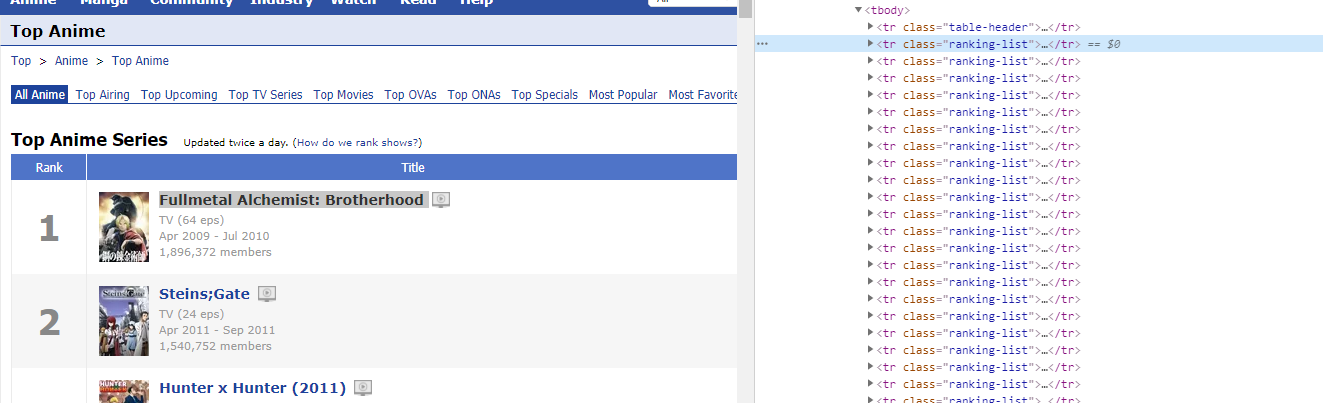

In [4]:
# studying how to extract the information from the first container
first_rank = rank_containers[0]

In [5]:
#getting the name of the first anime
first_name = first_rank.div.a.text
first_name

'Fullmetal Alchemist: Brotherhood'

In [6]:
#getting the id of the anime
first_id = first_rank.find('div', attrs = {'class':'hoverinfo'})
first_id = first_id['id'].replace('info', '')
first_id

'5114'

In [8]:
#getting the rank
rank_number = int(first_rank.span.text)
rank_number

1

In [9]:
#info about members, label, season, number of episodes
test_first = first_rank.div.find('div', attrs = {'class':'information'}).text.replace(" ", "").split()
test_first

['TV(64eps)', 'Apr2009-Jul2010', '1,896,372members']

In [12]:
# organizing the future columns 
test_info = test_first[0].replace('(', " ").replace(')', " ").split() # splitting the information about media and episodes 
test_media = test_info[0] 
test_episodes = int(test_info[1].replace('eps', ''))
test_season = test_first[1]
test_member = int(test_first[2].replace('members', '').replace(',', ''))

print(test_media, test_episodes, test_season, test_member, sep='\n')

TV
64
Apr2009-Jul2010
1896372


In [13]:
# getting the first score
first_score = float(first_rank.find('td', attrs = {'class': "score ac fs14"}).text)
first_score

9.22

## Now that we retrieved all the information we wanted, let's test it !

In [14]:
#lists to store the scraped data in
anime_id = []
anime_name = []
anime_rank = []
anime_media = []
anime_episodes = []
anime_season = []
anime_members = []
anime_score = []

for container in rank_containers: # it goes through every one of the 50 containers of the first page 

# The id
    cont_id = container.find('div', attrs = {'class':'hoverinfo'})
    cont_id = cont_id['id'].replace('info', '')
    anime_id.append(cont_id)

# The name
    name = container.div.a.text   
    anime_name.append(name)

# The rank
    rank_number = int(container.span.text)
    anime_rank.append(rank_number)
    
# retrieving info  
    info = container.div.find('div', attrs = {'class':'information'}).text.replace(" ", "").split()
# splitting the information about media and episodes    
    info_media_epi = info[0].replace('(', " ").replace(')', " ").split()  
# The media
    media = info_media_epi[0]
    anime_media.append(media)
# The episodes
    episodes = int(info_media_epi[1].replace('eps', ''))
    anime_episodes.append(episodes)
# The season
    season = info[1]
    anime_season.append(season)
# The members
    members = int(info[2].replace('members', '').replace(',', ''))
    anime_members.append(members)
# The score
    score = float(container.find('td', attrs = {'class': "score ac fs14"}).text)
    anime_score.append(score)

In [15]:
# let's create a table to see what we've scraped
test_df = pd.DataFrame({'id':anime_id, 'name':anime_name, 'rank':anime_rank, 'media':anime_media,
                       'episodes':anime_episodes, 'season':anime_season, 'members':anime_members, 'score':anime_score})
print(test_df.info())
test_df 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        50 non-null     object 
 1   name      50 non-null     object 
 2   rank      50 non-null     int64  
 3   media     50 non-null     object 
 4   episodes  50 non-null     int64  
 5   season    50 non-null     object 
 6   members   50 non-null     int64  
 7   score     50 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 3.2+ KB
None


,id,name,rank,media,episodes,season,members,score
0,5114,Fullmetal Alchemist: Brotherhood,1,TV,64,Apr2009-Jul2010,1896372,9.22
1,9253,Steins;Gate,2,TV,24,Apr2011-Sep2011,1540752,9.13
2,11061,Hunter x Hunter (2011),3,TV,148,Oct2011-Sep2014,1318514,9.12
3,820,Ginga Eiyuu Densetsu,4,OVA,110,Jan1988-Mar1997,200283,9.11
4,28977,Gintama°,5,TV,51,Apr2015-Mar2016,338210,9.11
5,9969,Gintama',6,TV,51,Apr2011-Mar2012,318023,9.09
6,38524,Shingeki no Kyojin Season 3 Part 2,7,TV,10,Apr2019-Jul2019,697029,9.07
7,15417,Gintama': Enchousen,8,TV,13,Oct2012-Mar2013,192391,9.04
8,35180,3-gatsu no Lion 2nd Season,9,TV,22,Oct2017-Mar2018,217536,9.02
9,32281,Kimi no Na wa.,10,Movie,1,Aug2016-Aug2016,1411235,9.02


* The table looks fine !

## Now let's try to scrape more pages.

In [17]:
def scrape_ranks(number_pages=71):
    # Redeclaring the lists to store data in
    anime_id = []
    anime_name = []
    anime_rank = []
    anime_media = []
    anime_episodes = []
    anime_season = []
    anime_members = []
    anime_score = []

    # Preparing the monitoring of the loop
    start_time = time.time()
    requests = 0

    # For every page in a range of 71 pages
    for i in range(0, number_pages*50, 50):


        # Make a get request
        url = 'https://myanimelist.net/topanime.php?limit={}'.format(i)
        headers = {"User-Agent": "mal review scraper for research."}
        response = get(url, headers = headers)

        # Pause the loop
        time.sleep(random.randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time.time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warnings.warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warnings.warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 anime containers from a single page
        an_containers = page_html.find_all('tr', class_ = "ranking-list")

        # For every anime of these 50
        for container in an_containers:

        # The id
            try:
                cont_id = container.find('div', attrs = {'class':'hoverinfo'})
                cont_id = cont_id['id'].replace('info', '')
            except:
                cont_id = 'null'
            anime_id.append(cont_id)

        # The name
            try:
                name = container.div.a.text
            except:
                name = 'null'
            anime_name.append(name)

        # The rank
            rank_number = int(container.span.text)
            anime_rank.append(rank_number)

        # retrieving info  
            info = container.div.find('div', attrs = {'class':'information'}).text.replace(" ", "").split()
        # splitting the information about media and episodes    
            info_media_epi = info[0].replace('(', " ").replace(')', " ").split()  
        # The media
            try:
                media = info_media_epi[0]
            except:
                media = 'null'
            anime_media.append(media)
        # The episodes
            try:
                episodes = int(info_media_epi[1].replace('eps', ''))
            except:
                episodes = 'null'
            anime_episodes.append(episodes)
        # The season
            season = info[1]
            anime_season.append(season)
        # The members
            try:
                members = int(info[2].replace('members', '').replace(',', ''))
            except:
                members = 'null'
            anime_members.append(members)
        # The score
            try:    
                score = float(container.find('td', attrs = {'class': "score ac fs14"}).text)
            except:
                scrore = 'null'
            anime_score.append(score)
    return pd.DataFrame({'id':anime_id, 'name':anime_name, 'rank':anime_rank, 'media':anime_media,
                         'episodes':anime_episodes, 'season':anime_season, 'members':anime_members, 'score':anime_score})


In [18]:
# scraping 71 pages of ranks
anime_ranks = scrape_ranks()

Request:71; Frequency: 0.08572317553597743 requests/s


In [20]:
print(anime_ranks.info())
anime_ranks 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        3550 non-null   object 
 1   name      3550 non-null   object 
 2   rank      3550 non-null   int64  
 3   media     3550 non-null   object 
 4   episodes  3550 non-null   object 
 5   season    3550 non-null   object 
 6   members   3550 non-null   int64  
 7   score     3550 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 222.0+ KB
None


,id,name,rank,media,episodes,season,members,score
0,5114,Fullmetal Alchemist: Brotherhood,1,TV,64,Apr2009-Jul2010,1896372,9.22
1,9253,Steins;Gate,2,TV,24,Apr2011-Sep2011,1540752,9.13
2,11061,Hunter x Hunter (2011),3,TV,148,Oct2011-Sep2014,1318514,9.12
3,820,Ginga Eiyuu Densetsu,4,OVA,110,Jan1988-Mar1997,200283,9.11
4,28977,Gintama°,5,TV,51,Apr2015-Mar2016,338210,9.11
...,...,...,...,...,...,...,...,...
3545,10507,Inazuma Eleven Go,3546,TV,47,May2011-Apr2012,46149,7.01
3546,4082,Kaibutsu Oujo: Konsui Oujo,3547,Special,1,Feb2008-Feb2008,9784,7.01
3547,1864,Koisuru Tenshi Angelique: Kagayaki no Ashita,3548,TV,12,Jan2007-Mar2007,8677,7.01
3548,21853,Love Live! School Idol Project Recap,3549,Special,1,Dec2013-Dec2013,7465,7.01


In [21]:
# saving into a csv table
anime_ranks.to_csv('anime.csv', index=False)

# Conclusions:

* We manage to successfully scrape 3550 animes from the ranks page. 
* The next step is to use this information in a data analysis
* We could also look into some other information we could scrape such as the genre.
* For a better understanting on how to retrive the information from the html page look into the references.

# References:

* https://codingdisciple.com/MAL-web-scraper.html
* https://www.dataquest.io/blog/web-scraping-beautifulsoup/